<a href="https://colab.research.google.com/github/taeo09/opencv-/blob/main/opencv_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프롬프트 : opencv를 활용해서 인터넷에서 다운받은 사진을 바탕 화면에 저장했고 이 데이터를 입력받아 오픈 cv로 이미지 인식이 되는 걸 구글 코랩에서 실행하고 싶어 코드를 만들어줘

Saving 1.jpg to 1.jpg
✅ 업로드 완료: 1.jpg


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


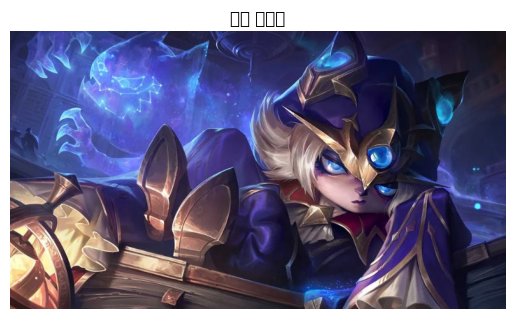

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44404 (\N{HANGUL SYLLABLE GUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

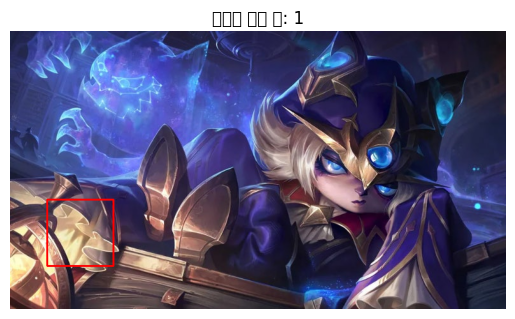

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =======================================
# 📸 OpenCV로 이미지 인식하기 (Google Colab)
# =======================================

# 1️⃣ OpenCV 설치
!pip install opencv-python

# 2️⃣ Colab에 파일 업로드
# - 이 코드 실행 후 파일 업로드 창이 뜨면
#   바탕화면에 저장한 이미지를 선택하세요.
from google.colab import files
uploaded = files.upload()

# 업로드한 파일 이름 확인
import os
for filename in uploaded.keys():
    print(f"✅ 업로드 완료: {filename}")
    image_path = filename  # 파일 경로 저장

# 3️⃣ OpenCV로 이미지 불러오기
import cv2
import matplotlib.pyplot as plt

# 이미지 읽기 (cv2.imread는 기본적으로 BGR 형식)
img = cv2.imread(image_path)

# BGR → RGB 변환 (matplotlib은 RGB 사용)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(img_rgb)
plt.axis('off')
plt.title("원본 이미지")
plt.show()

# 4️⃣ 얼굴 인식 (예시)
# - OpenCV에서 제공하는 기본 Haar Cascade 사용
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 그레이스케일로 변환 (얼굴 탐지 정확도 향상)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# 검출된 얼굴 주위에 사각형 그리기
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

# 결과 출력
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"인식된 얼굴 수: {len(faces)}")
plt.show()

# 5️⃣ 결과 저장 (선택 사항)
# Colab 환경에 인식 결과 저장 후 다운로드 가능
output_path = "result.jpg"
cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
files.download(output_path)
